## FitBit Fitness Tracker Data
#### Daily Activite

<h3>import neccessey library<h3>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

<h3>Read Data from Csv file<h3>

In [ ]:
df = pd.read_csv('dailyActivity_merged.csv')


<H2>Preprocessing The Data<H2>


In [ ]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [ ]:
# checking if the Id is unique or not .
df['Id'].nunique()

33

<h4>in this data we deal with the Total steps and minutes and we analyze the relationship between the total calories and we drop the Insignificant  columns from data<h4>

In [ ]:
# Filter to make the data more handle and can deal with this data
data = [
    'Id','ActivityDate','TotalSteps','VeryActiveMinutes',
    'FairlyActiveMinutes','LightlyActiveMinutes',
    'SedentaryMinutes','Calories'
]
df = df[data]
df.head(10)

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863
5,1503960366,4/17/2016,9705,38,20,164,539,1728
6,1503960366,4/18/2016,13019,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,50,31,264,775,2035
8,1503960366,4/20/2016,10544,28,12,205,818,1786
9,1503960366,4/21/2016,9819,19,8,211,838,1775


In [ ]:
df.rename(columns={'ActivityDate':'Date'},inplace=True)
df.head(10)

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863
5,1503960366,4/17/2016,9705,38,20,164,539,1728
6,1503960366,4/18/2016,13019,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,50,31,264,775,2035
8,1503960366,4/20/2016,10544,28,12,205,818,1786
9,1503960366,4/21/2016,9819,19,8,211,838,1775


In [ ]:
# Make this column to calc the total minutes for all acitivity miuntes
df['TotalMinutes'] = df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']+ df['VeryActiveMinutes']
df.head(10)

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040
5,1503960366,4/17/2016,9705,38,20,164,539,1728,761
6,1503960366,4/18/2016,13019,42,16,233,1149,1921,1440
7,1503960366,4/19/2016,15506,50,31,264,775,2035,1120
8,1503960366,4/20/2016,10544,28,12,205,818,1786,1063
9,1503960366,4/21/2016,9819,19,8,211,838,1775,1076


In [ ]:
# Make this column to calc the total Hours for all acitivity by divide the total miuntes to 60
df['TotalHours'] = np.round(df['TotalMinutes']/60)

In [ ]:
df.head(10)

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094,18.0
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033,17.0
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998,17.0
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040,17.0
5,1503960366,4/17/2016,9705,38,20,164,539,1728,761,13.0
6,1503960366,4/18/2016,13019,42,16,233,1149,1921,1440,24.0
7,1503960366,4/19/2016,15506,50,31,264,775,2035,1120,19.0
8,1503960366,4/20/2016,10544,28,12,205,818,1786,1063,18.0
9,1503960366,4/21/2016,9819,19,8,211,838,1775,1076,18.0


In [ ]:
# to know if found null value or not and check the data type for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    940 non-null    int64  
 1   Date                  940 non-null    object 
 2   TotalSteps            940 non-null    int64  
 3   VeryActiveMinutes     940 non-null    int64  
 4   FairlyActiveMinutes   940 non-null    int64  
 5   LightlyActiveMinutes  940 non-null    int64  
 6   SedentaryMinutes      940 non-null    int64  
 7   Calories              940 non-null    int64  
 8   TotalMinutes          940 non-null    int64  
 9   TotalHours            940 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 73.6+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    940 non-null    int64         
 1   Date                  940 non-null    datetime64[ns]
 2   TotalSteps            940 non-null    int64         
 3   VeryActiveMinutes     940 non-null    int64         
 4   FairlyActiveMinutes   940 non-null    int64         
 5   LightlyActiveMinutes  940 non-null    int64         
 6   SedentaryMinutes      940 non-null    int64         
 7   Calories              940 non-null    int64         
 8   TotalMinutes          940 non-null    int64         
 9   TotalHours            940 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 73.6 KB


In [ ]:
# Define a new Column that contain the Day of week
df['DayOfWeek'] = df['Date'].dt.day_name()

In [ ]:
# show the data after all edition
df.head(10)

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,DayOfWeek
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday
5,1503960366,2016-04-17,9705,38,20,164,539,1728,761,13.0,Sunday
6,1503960366,2016-04-18,13019,42,16,233,1149,1921,1440,24.0,Monday
7,1503960366,2016-04-19,15506,50,31,264,775,2035,1120,19.0,Tuesday
8,1503960366,2016-04-20,10544,28,12,205,818,1786,1063,18.0,Wednesday
9,1503960366,2016-04-21,9819,19,8,211,838,1775,1076,18.0,Thursday


<h3>Here we will check if there is any null values<h3>

In [ ]:
df.isnull().sum()

Id                      0
Date                    0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
TotalMinutes            0
TotalHours              0
DayOfWeek               0
dtype: int64

no null Values


In [ ]:
df.duplicated().sum()

0

No Duplicated Value
<h3>Analysis and Visualization<h3>

In [ ]:
df.describe()

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283


<h4>we can notice from the TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes Columns that most people do not practice sports because the big difference between Total steps and active steps<h4>

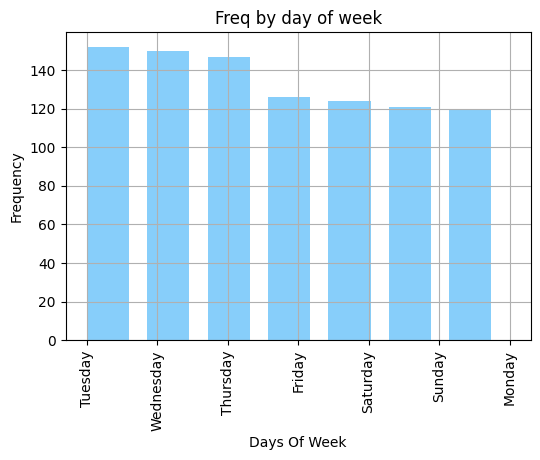

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['DayOfWeek'], bins=7, color='lightskyblue', width=0.6)
plt.xticks(rotation = 90)
plt.grid()
plt.title("Freq by day of week")
plt.xlabel('Days Of Week')
plt.ylabel('Frequency')
plt.show()

<h4>We notice that people are very active in tuesday, wednesday, and thursday, so we can send motivation message for people in the other days<h4>

In [ ]:
# To select the numerical value only
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

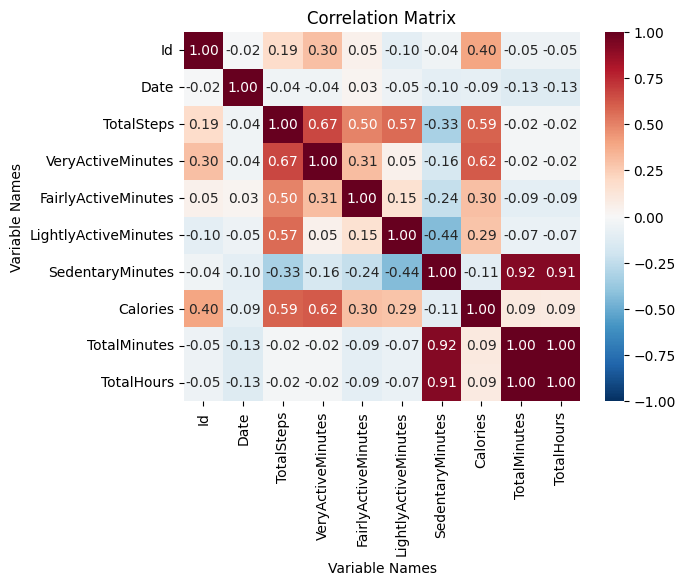

In [ ]:
# Here we display the corr between all columns
heatmap = sns.heatmap(df[numerical_columns].corr(), cmap="RdBu_r", annot=True, fmt=".2f", vmin=-1, vmax=1)

heatmap.set_title("Correlation Matrix")
heatmap.set_xlabel("Variable Names")
heatmap.set_ylabel("Variable Names")

plt.show()

<h4>from the heatmap we can notice that the TotalSteps and VeryActiveMintues Columns have the highest influence on the Calories column<h4>

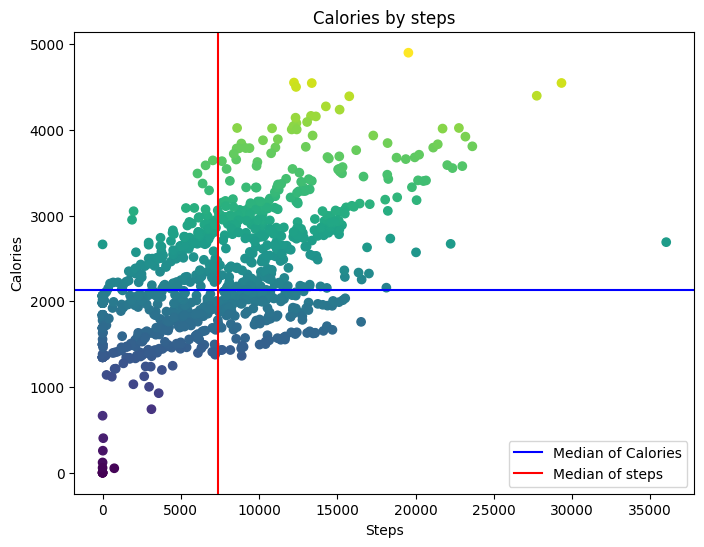

In [ ]:
# Visualize the relationship between the TotalSteps column and the Calories column
plt.figure(figsize=(8,6))
plt.scatter(df['TotalSteps'],df['Calories'],c = df['Calories'])
mediansteps =  7405
medianCalory = 2134
plt.axhline(medianCalory, color = 'blue', label = "Median of Calories")
plt.axvline(mediansteps, color = 'red', label = "Median of steps")
plt.title("Calories by steps")
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.legend()
plt.show()

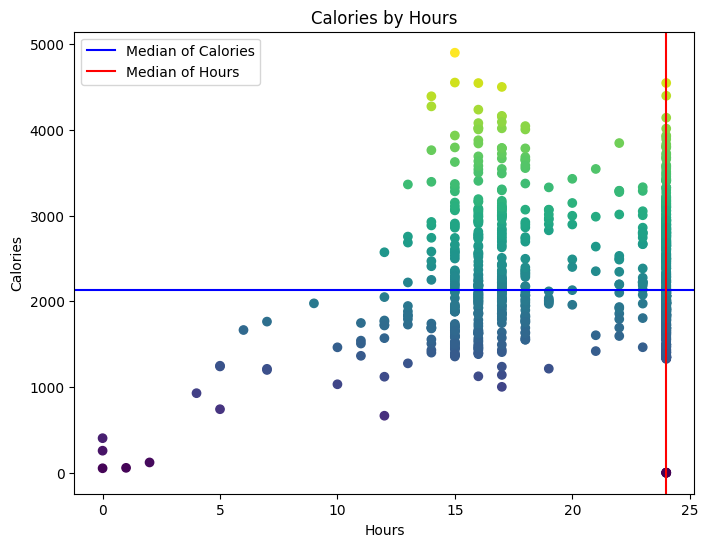

In [ ]:
# Visualize the relationship between the TotalHours column and the Calories column
plt.figure(figsize=(8,6))
plt.scatter(df['TotalHours'],df['Calories'],c = df['Calories'])
medianHours =  24
medianCalory = 2134
plt.axhline(medianCalory, color = 'blue', label = "Median of Calories")
plt.axvline(medianHours, color = 'red', label = "Median of Hours")
plt.title("Calories by Hours")
plt.xlabel('Hours')
plt.ylabel('Calories')
plt.legend()
plt.show()

<h4>we notice that there is a weak relationship between them, and I think this happened because the few number of active minutes<h4>

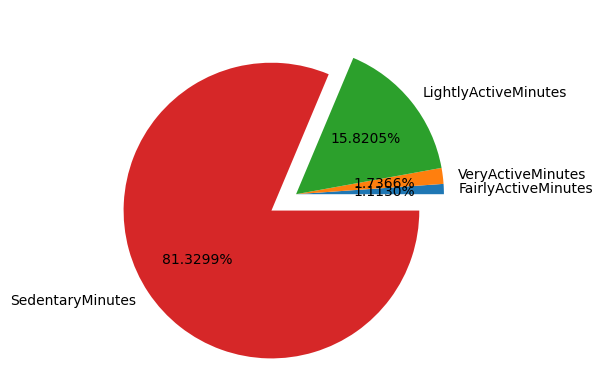

In [ ]:
# Visualize the percentage of each column of these columns {VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes}
FairlyActiveMinutes = df['FairlyActiveMinutes'].sum()
VeryActiveMinutes = df['VeryActiveMinutes'].sum()
LightlyActiveMinutes = df['LightlyActiveMinutes'].sum()
SedentaryMinutes = df['SedentaryMinutes'].sum()

minuts = [FairlyActiveMinutes,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes]
label = ['FairlyActiveMinutes','VeryActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']

plt.pie(minuts,labels=label,autopct='%1.4f%%',explode=[0,0,0,0.2])
plt.show()

<h3>we can say that 81 percent of users use the program to calculate calories burned in normal daily activities, and they are also very active in the middle and end of the week<h3>

Machine Learning
Import H2O

In [ ]:
# Install H2O using pip
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.2-py2.py3-none-any.whl size=265365378 sha256=fbad2ef923019384bdcda7500575638bdc1fc0e43e8211da9659cadead7f1d81
  Stored in directory: /root/.cache/pip/wheels/63/14/f4/9fff736a0df59884631031b604e7b000a70409f5b7adafc2c6
Successfully built h2o


Import H2O evaluators and algorithms, as well as importing the dataset

In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2ODeepLearningEstimator, H2ORandomForestEstimator, H2OXGBoostEstimator, H2ONaiveBayesEstimator, H2OGeneralizedLinearEstimator


h2o.init()

# Load your dataset
data = h2o.import_file("/content/dailyActivity_merged.csv")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,57 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_niqxms
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Splitting the data and defining the column of focus in our process

Because data was not available for Fatigue Assessment Score, we decided to use the data column **VeryActiveMinutes** as a replacement for fatigue score data for the sake of this paper.


In [ ]:
# Split the data into train and test sets
train, test = data.split_frame(ratios=[0.8], seed=1234)

# Define the response column
response_column = "VeryActiveMinutes"

Loading the models

In [ ]:
# Define the list of classification algorithms
algorithms = [
    ("GBM", H2OGradientBoostingEstimator),
    ("DeepLearning", H2ODeepLearningEstimator),
    ("RandomForest", H2ORandomForestEstimator),
    ("XGBoost", H2OXGBoostEstimator),
    ("GLM", H2OGeneralizedLinearEstimator),
]


# Dictionary to store models
models = {}

Training

In [ ]:
# Train and evaluate models
for algorithm_name, algorithm in algorithms:
    model = algorithm()
    model.train(x=data.columns, y=response_column, training_frame=train)
    models[algorithm_name] = model
    print(f"{algorithm_name} model trained.")

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
GBM model trained.
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
DeepLearning model trained.
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
RandomForest model trained.
xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
XGBoost model trained.
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
GLM model trained.


Model Evaluations using MSE

In [ ]:
# Evaluate models using MSE as the evaluation metric
evaluations = {}
for algorithm_name, model in models.items():
    mse = model.model_performance(test).mse()
    evaluations[algorithm_name] = mse
    print(f"{algorithm_name} model MSE: {mse}")

GBM model MSE: 96.73375184333615
DeepLearning model MSE: 111.18498668411308
RandomForest model MSE: 103.84657880434781
XGBoost model MSE: 73.26421453191911
GLM model MSE: 186.09144360812093


Solution result of best model based on MSE test trial

In [ ]:
# Find the best model based on the evaluation metric
best_model_name = min(evaluations, key=evaluations.get)
best_model = models[best_model_name]
print(f"The best model is {best_model_name} with MSE: {evaluations[best_model_name]}")

# Shutdown H2O
h2o.shutdown()


The best model is XGBoost with MSE: 73.26421453191911
H2O session _sid_8531 closed.


<ipython-input-60-c7adeb200299>:7: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 mins 49 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_niqxms
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.151 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                           mean_per_class_error    logloss      rmse       mse
XGBoost_3_AutoML_2_20240515_165132                             0.852367    2.31832  0.708064  0.501355
XRT_1_AutoML_2_20240515_165132                                 0.852918    5.17742  0.711942  0.506861
DRF_1_AutoML_2_20240515_165132                                 0.857534    4.96511  0.710063  0.50419
GBM_grid_1_AutoML_2_20240515_165132_model_1                    0.863412    9.1202   0.732508  0.536568
XGBoost_grid_1_AutoML_2_20240515_165132_model_7                0.86389     2.38417  0.712455  0.507593
GBM_4_AutoML_2_20240515_165132                                 0.864313   12.3023   0.748524  0.560288
GBM_1_AutoML_2_20240515_165132                                 0.864631    8.94268  0.7687

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

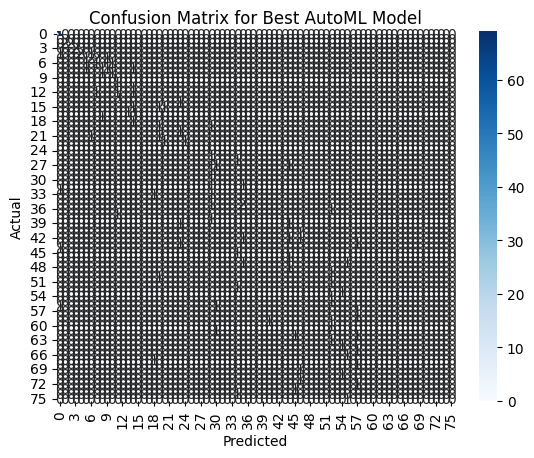

H2O session _sid_9469 closed.


In [ ]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

h2o.init()
data = h2o.import_file("/content/dailyActivity_merged.csv")

# Convert the response column to a categorical variable if needed
data['VeryActiveMinutes'] = data['VeryActiveMinutes'].asfactor()

train, test = data.split_frame(ratios=[0.8], seed=1234)

response_column = "VeryActiveMinutes"

aml = H2OAutoML(max_runtime_secs=3600, seed=1234, exclude_algos=["GLM"])
aml.train(x=data.columns, y=response_column, training_frame=train)

leaderboard = aml.leaderboard
print(leaderboard)

best_model = aml.leader

predictions = best_model.predict(test)

actual = test[response_column].as_data_frame().values.flatten()
predicted = predictions['predict'].as_data_frame().values.flatten()

# Generate a confusion matrix
conf_matrix = confusion_matrix(actual, predicted)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Best AutoML Model')
plt.show()

# Shutdown H2O
h2o.cluster().shutdown()
